In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt



ds = pd.read_csv("/content/knndata.csv")

ds.drop(["id","Unnamed: 32"],axis=1,inplace=True)
ds.tail()
M = ds[ds.diagnosis == "M"]
B = ds[ds.diagnosis == "B"]
# malignant = M  bad
# benign = B     good



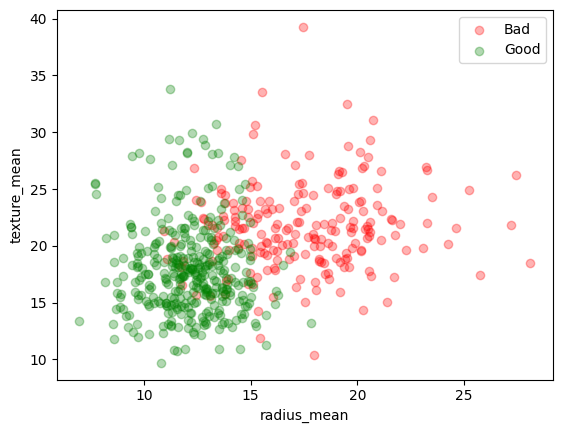

In [2]:
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Bad",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Good",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [3]:
ds.diagnosis = [1 if each =="M" else 0 for each in ds.diagnosis ]
y = ds.diagnosis.values
x_data = ds.drop(["diagnosis"],axis = 1)


In [4]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [5]:


from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.31,random_state=31)



In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_head = knn.predict(x_test)


print(" {} nn score {}".format(3, knn.score(x_test, y_test)))



 3 nn score 0.903954802259887


In [7]:
holder = 0.00
for each in range(1,350):
    knn2 = KNeighborsClassifier(n_neighbors= each)
    knn2.fit(x_train, y_train)
    if knn2.score(x_test, y_test) > holder:
       holder =  knn2.score(x_test, y_test)


print("Max değer :",holder)

Max değer : 0.9378531073446328
